In [5]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

# Step 2: Load the Dataset
df = pd.read_csv('C:/Users/employee.csv')
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [7]:
# Show column names and data types
print(df.info())

# Unique values in each column and their lengths
for col in df.columns:
    print(f"\nColumn: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Length: {len(df[col].unique())}")

# Rename columns (example, customize as needed)
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# Statistical summary
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None

Column: Company
Unique values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length: 7

Column: Age
Unique values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length: 30

Column: Salary
Unique values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5

In [9]:

# Replace 0 in 'age' with NaN (assuming age column exists)
df['age'] = df['age'].replace(0, np.nan)

# Check missing values
print(df.isnull().sum())

# Fill missing values
df.fillna({
    'age': df['age'].median(),
    'salary': df['salary'].median()
    # Add more fields if needed
}, inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Detect outliers using IQR (for age and salary)
for col in ['age', 'salary']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"Outliers in {col}: {outliers.shape[0]}")


company     8
age        24
salary     24
place      14
country     0
gender      0
dtype: int64
Outliers in age: 0
Outliers in salary: 0


     company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


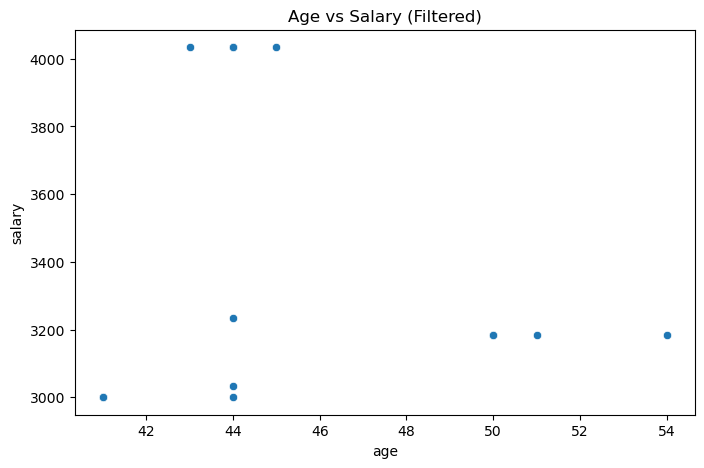

place
Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


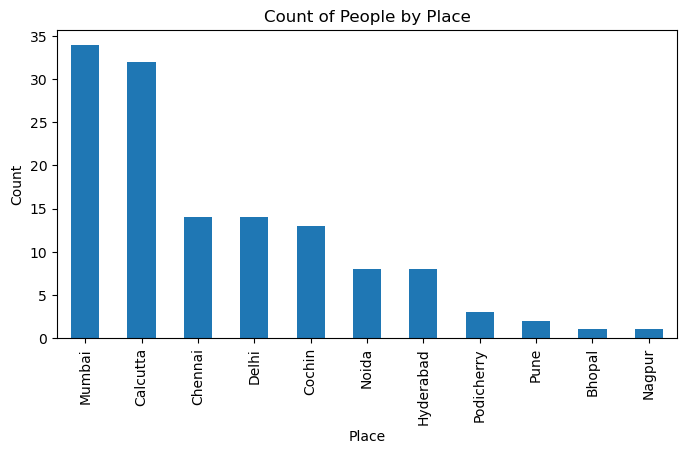

In [11]:
# Filter records with age > 40 and salary < 5000
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
print(filtered_df)

# Plot age vs salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered_df, x='age', y='salary')
plt.title("Age vs Salary (Filtered)")
plt.show()

# Count of people by place (assuming 'place' column exists)
place_count = df['place'].value_counts()
print(place_count)

# Bar chart of people by place
place_count.plot(kind='bar', figsize=(8, 4), title="Count of People by Place")
plt.xlabel("Place")
plt.ylabel("Count")
plt.show()


In [33]:
# Label Encoding for binary/ordinal columns (example: 'gender')
if 'gender' in df.columns:
    le = LabelEncoder()
    df['gender_encoded'] = le.fit_transform(df['gender'])

# One-Hot Encoding for nominal categorical columns (example: 'place')

 vdf = pd.get_dummies(df, columns=['place'], drop_first=True)



['place_Calcutta', 'place_Chennai', 'place_Cochin', 'place_Delhi', 'place_Hyderabad', 'place_Mumbai', 'place_Nagpur', 'place_Noida', 'place_Podicherry', 'place_Pune']


KeyError: "None of [Index(['place'], dtype='object')] are in the [columns]"

In [23]:
print(df.columns)

Index(['company', 'age', 'salary', 'country', 'gender', 'gender_encoded',
       'place_Calcutta', 'place_Chennai', 'place_Cochin', 'place_Delhi',
       'place_Hyderabad', 'place_Mumbai', 'place_Nagpur', 'place_Noida',
       'place_Podicherry', 'place_Pune'],
      dtype='object')


In [35]:
# Select only numeric columns for scaling
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Apply StandardScaler
scaler_std = StandardScaler()
df_std = pd.DataFrame(scaler_std.fit_transform(df[num_cols]), columns=[col+'_std' for col in num_cols])

# Apply MinMaxScaler
scaler_mm = MinMaxScaler()
df_mm = pd.DataFrame(scaler_mm.fit_transform(df[num_cols]), columns=[col+'_mm' for col in num_cols])

# Combine scaled data with original
df_scaled = pd.concat([df, df_std, df_mm], axis=1)

df_scaled.head()


,company,age,salary,country,gender,gender_encoded,place_Calcutta,place_Chennai,place_Cochin,place_Delhi,...,place_Podicherry,place_Pune,age_std,salary_std,gender_std,gender_encoded_std,age_mm,salary_mm,gender_mm,gender_encoded_mm
0,TCS,20.0,5000.0,India,0.0,0.0,False,True,False,False,...,False,False,-1.484676,-0.100827,-0.534522,-0.534522,0.081081,0.445089,0.0,0.0
1,Infosys,30.0,5000.0,India,0.0,0.0,False,False,False,False,...,False,False,-0.267174,-0.100827,-0.534522,-0.534522,0.351351,0.445089,0.0,0.0
2,TCS,35.0,2300.0,India,0.0,0.0,True,False,False,False,...,False,False,0.341577,-1.243735,-0.534522,-0.534522,0.486486,0.137817,0.0,0.0
3,Infosys,40.0,3000.0,India,0.0,0.0,False,False,False,True,...,False,False,0.950328,-0.947426,-0.534522,-0.534522,0.621622,0.217480,0.0,0.0
4,TCS,23.0,4000.0,India,0.0,0.0,False,False,False,False,...,False,False,-1.119426,-0.524127,-0.534522,-0.534522,0.162162,0.331285,0.0,0.0


In [37]:
print("Final DataFrame shape after all preprocessing:", df_scaled.shape)
df_scaled.info()


Final DataFrame shape after all preprocessing: (147, 24)
<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 131
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company             136 non-null    object 
 1   age                 144 non-null    float64
 2   salary              144 non-null    float64
 3   country             144 non-null    object 
 4   gender              144 non-null    float64
 5   gender_encoded      144 non-null    float64
 6   place_Calcutta      144 non-null    object 
 7   place_Chennai       144 non-null    object 
 8   place_Cochin        144 non-null    object 
 9   place_Delhi         144 non-null    object 
 10  place_Hyderabad     144 non-null    object 
 11  place_Mumbai        144 non-null    object 
 12  place_Nagpur        144 non-null    object 
 13  place_Noida         144 non-null    object 
 14  place_Podicherry    144 non-null    object 
 15  place